<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/GPAW_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Table of Contents

1. Install GPAW and JARVIS-Tools
2. Aluminum crystal structure
3. Silicon bandstructure
4. Interface energy calculation


Run GPAW on Google-colab and calculate interface energy with jarvis-tools

In [2]:
!apt install python3-mpi4py cython3 libxc-dev gpaw-data
!pip -q install gpaw jarvis-tools

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libxc9
Suggested packages:
  cython-doc python3-numpy
The following NEW packages will be installed:
  cython3 gpaw-data libxc-dev libxc9 python3-mpi4py
0 upgraded, 5 newly installed, 0 to remove and 18 not upgraded.
Need to get 66.5 MB of archives.
After this operation, 102 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 cython3 amd64 0.29.28-1ubuntu3 [1,336 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 gpaw-data all 0.9.20000-2 [52.7 MB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libxc9 amd64 5.1.7-1ubuntu1 [3,900 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libxc-dev amd64 5.1.7-1ubuntu1 [8,038 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/universe amd64 python3-mpi4py amd64 3.1.3-1build2 [465 kB]
Fetched 66.5 MB in 1s (53.5 

In [2]:
!gpaw test

 -------------------------------------------------------------------------------------------------
| python-3.10.12    /usr/bin/python3                                                              |
| gpaw-23.9.1       /usr/local/lib/python3.10/dist-packages/gpaw/                                 |
| ase-3.22.1        /usr/local/lib/python3.10/dist-packages/ase/                                  |
| numpy-1.23.5      /usr/local/lib/python3.10/dist-packages/numpy/                                |
| scipy-1.11.3      /usr/local/lib/python3.10/dist-packages/scipy/                                |
| libxc-5.1.7       yes                                                                           |
| _gpaw             /usr/local/lib/python3.10/dist-packages/_gpaw.cpython-310-x86_64-linux-gnu.so |
| MPI enabled       yes                                                                           |
| OpenMP enabled    no                                                                            |
|

In [3]:
!gpaw info

 -------------------------------------------------------------------------------------------------
| python-3.10.12    /usr/bin/python3                                                              |
| gpaw-23.9.1       /usr/local/lib/python3.10/dist-packages/gpaw/                                 |
| ase-3.22.1        /usr/local/lib/python3.10/dist-packages/ase/                                  |
| numpy-1.23.5      /usr/local/lib/python3.10/dist-packages/numpy/                                |
| scipy-1.11.3      /usr/local/lib/python3.10/dist-packages/scipy/                                |
| libxc-5.1.7       yes                                                                           |
| _gpaw             /usr/local/lib/python3.10/dist-packages/_gpaw.cpython-310-x86_64-linux-gnu.so |
| MPI enabled       yes                                                                           |
| OpenMP enabled    no                                                                            |
|

FCC Aluminum

In [4]:
%%time
# Sample calculation from https://wiki.fysik.dtu.dk/gpaw/tutorialsexercises/structureoptimization/aluminium/aluminium.html
from ase import Atoms
from ase.visualize import view
from gpaw import GPAW, PW

name = 'Al-fcc'
a = 4.05  # fcc lattice parameter
b = a / 2

bulk = Atoms('Al',
             cell=[[0, b, b],
                   [b, 0, b],
                   [b, b, 0]],
             pbc=True)

view(bulk)

k = 4
calc = GPAW(mode=PW(300),       # cutoff
            kpts=(k, k, k),     # k-points
            txt=name + '.txt')  # output file

bulk.calc = calc

energy = bulk.get_potential_energy()
calc.write(name + '.gpw')
print('Energy:', energy, 'eV')

Energy: -4.122151616078255 eV
CPU times: user 2.53 s, sys: 1.09 s, total: 3.63 s
Wall time: 4.17 s


In [5]:
from jarvis.db.figshare import get_jid_data
from jarvis.core.atoms import Atoms
from jarvis.core.kpoints import Kpoints3D
jid = 'JVASP-816'
dat = get_jid_data(jid=jid,dataset='dft_3d')
atoms = Atoms.from_dict(dat['atoms'])
atoms = atoms.get_conventional_atoms
ase_atoms = (atoms.get_conventional_atoms).ase_converter()
kp = Kpoints3D().automatic_length_mesh(
    #lattice_mat=atoms.lattice_mat,
    #length=10
    lattice_mat=atoms.lattice_mat, length=dat["kpoint_length_unit"]
)
kpts = kp._kpoints[0]



Obtaining 3D dataset 76k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815699


100%|██████████| 40.8M/40.8M [00:02<00:00, 19.7MiB/s]


Loading the zipfile...
Loading completed.


In [6]:
kpts

[17, 17, 17]

In [7]:
ase_atoms

Atoms(symbols='Al4', pbc=True, cell=[4.06741, 4.06741, 4.06741])

In [ ]:
%%time
# Sample calculation from https://wiki.fysik.dtu.dk/gpaw/tutorialsexercises/structureoptimization/aluminium/aluminium.html
from ase import Atoms
from ase.visualize import view
from gpaw import GPAW, PW



calc = GPAW(mode=PW(500),       # cutoff
            kpts=kpts,     # k-points
            txt=name + '.txt')  # output file

ase_atoms.calc = calc

energy = ase_atoms.get_potential_energy()
#calc.write(name + '.gpw')
print('Energy:', energy, 'eV')

Energy: -16.655990977511557 eV
CPU times: user 2min 25s, sys: 1min 32s, total: 3min 58s
Wall time: 2min 56s


In [ ]:
%%time
import numpy as np
from ase.eos import calculate_eos
dx=np.arange(-0.05, 0.05, 0.01)
eos = calculate_eos(ase_atoms)
v, e, B = eos.fit()


In [ ]:
from ase.units import kJ
kv = B / kJ * 1.0e24
kv

83.74848683933646

Calculation of electronic band structure for Silicon

In [ ]:
from ase.build import bulk
from gpaw import GPAW, PW, FermiDirac

# Perform standard ground state calculation (with plane wave basis)
si = bulk('Si', 'diamond', 5.43)
calc = GPAW(mode=PW(200),
            xc='PBE',
            kpts=(8, 8, 8),
            random=True,  # random guess (needed if many empty bands required)
            occupations=FermiDirac(0.01),
            txt='Si_gs.txt')
si.calc = calc
si.get_potential_energy()
ef = calc.get_fermi_level()
calc.write('Si_gs.gpw')

In [ ]:
# Restart from ground state and fix potential:
calc = GPAW('Si_gs.gpw').fixed_density(
    nbands=16,
    symmetry='off',
    kpts={'path': 'GXWKL', 'npoints': 60},
    convergence={'bands': 8})


  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  23.6.1
 |___|_|             

User:   ???@e91e90618716
Date:   Wed Aug  2 19:31:15 2023
Arch:   x86_64
Pid:    176
CWD:    /content
Python: 3.10.12
gpaw:   /usr/local/lib/python3.10/dist-packages/gpaw
_gpaw:  /usr/local/lib/python3.10/dist-packages/
        _gpaw.cpython-310-x86_64-linux-gnu.so
ase:    /usr/local/lib/python3.10/dist-packages/ase (version 3.22.1)
numpy:  /usr/local/lib/python3.10/dist-packages/numpy (version 1.22.4)
scipy:  /usr/local/lib/python3.10/dist-packages/scipy (version 1.10.1)
libxc:  5.1.7
units:  Angstrom and eV
cores: 1
OpenMP: False
OMP_NUM_THREADS: 1

Input parameters:
  convergence: {bands: 8}
  gpts: [14 14 14]
  kpts: {npoints: 60,
         path: GXWKL}
  mode: {ecut: 200.0,
         name: pw}
  nbands: 16
  occupations: {name: fermi-dirac,
                width: 0.01}
  random: True
  symmetry: off
  xc: PBE

Initialize ...

species:
  Si:
    name: Silicon
    id:

<Axes: ylabel='energies [eV]'>

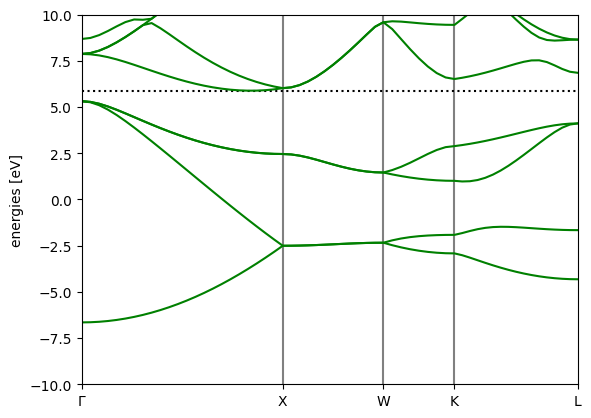

In [ ]:
%matplotlib inline
bs = calc.band_structure()
bs.plot(filename='bandstructure.png', show=False, emax=10.0)

# Adding silicon bandgap to the [JARVIS-Leaderboard](https://pages.nist.gov/jarvis_leaderboard/)

In [8]:
%%time
# Source: https://github.com/usnistgov/jarvis_leaderboard/blob/main/jarvis_leaderboard/contributions/gpaw_lda/run.py
import pandas as pd
from gpaw import GPAW, PW, FermiDirac
from jarvis.db.figshare import get_jid_data
from jarvis.core.atoms import Atoms
from jarvis.core.kpoints import Kpoints3D
import time
from ase.build import bulk
from gpaw import GPAW, PW, FermiDirac
#source: https://wiki.fysik.dtu.dk/gpaw/tutorialsexercises/electronic/band_gap/band_gap.html


def get_band_gap(atoms=None, cutoff=500,kpts=[7,7,7],xc='LDA'):
    calc = GPAW(mode=PW(cutoff),
                xc=xc,
                kpts=kpts,  # Choose and converge carefully!
                occupations=FermiDirac(0.01),
                txt='gs.out')
    atoms.calc = calc
    atoms.get_potential_energy()
    # Calculate the discontinuity potential and the discontinuity
    homo, lumo = calc.get_homo_lumo()
    efermi = calc.get_fermi_level()
    bandgap=lumo-homo
    # response = calc.hamiltonian.xc.response
    #dxc_pot = response.calculate_discontinuity_potential(homo, lumo)
    # KS_gap, dxc = response.calculate_discontinuity(dxc_pot)

    # Fundamental band gap = Kohn-Sham band gap + derivative discontinuity
    #QP_gap = KS_gap + dxc

    print('Band gap', bandgap)
    print('Fermi level', efermi)
    #print(f'Discontinuity from GLLB-sc: {dxc:.2f} eV')
    #print(f'Fundamental band gap:       {QP_gap:.2f} eV')
    return bandgap

dat = get_jid_data(jid='JVASP-1002',dataset='dft_3d')
silicon = Atoms.from_dict(dat['atoms'])
ase_atoms=silicon.ase_converter()
kp = Kpoints3D().automatic_length_mesh(

    lattice_mat=dat['atoms']['lattice_mat'],
    length=dat["kpoint_length_unit"],
)
kpts = kp._kpoints[0]
t1=time.time()
KS_gap = get_band_gap(atoms=ase_atoms,kpts=kpts)
t2=time.time()
print('Time', t2-t1)

Obtaining 3D dataset 76k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815699
Loading the zipfile...
Loading completed.
Band gap 0.5543736290147914
Fermi level 5.1754849232661915
Time 320.52579855918884
CPU times: user 5min 26s, sys: 4.59 s, total: 5min 30s
Wall time: 5min 31s


In [13]:
kpts

[11, 11, 11]

In [9]:
KS_gap

0.5543736290147914

In [10]:
f=open('ES-SinglePropertyPrediction-bandgap_JVASP_1002_Si-dft_3d-test-mae.csv','w')
f.write('id,prediction\n')
line=jid+','+str(KS_gap)+'\n'
f.write(line)
f.close()

In [11]:
!zip ES-SinglePropertyPrediction-bandgap_JVASP_1002_Si-dft_3d-test-mae.csv.zip ES-SinglePropertyPrediction-bandgap_JVASP_1002_Si-dft_3d-test-mae.csv

  adding: ES-SinglePropertyPrediction-bandgap_JVASP_1002_Si-dft_3d-test-mae.csv (stored 0%)


Now you can

1) [fork](https://github.com/usnistgov/jarvis_leaderboard/fork) the jarvis-leaderboard repo from GitHub,

2) add a folder with suitable name if the `jarvis_leaderboard/jarvis_leaderboard
/contributions` folder e.g. `gpaw_lda_test`,

3) add the `ES-SinglePropertyPrediction-bandgap_JVASP_1002_Si-dft_3d-test-mae.csv.zip` file, and then

4) make pull request from your forked repository to the main repo

In [12]:
!ls

Al-fcc.gpw  ES-SinglePropertyPrediction-bandgap_JVASP_1002_Si-dft_3d-test-mae.csv      gs.out
Al-fcc.txt  ES-SinglePropertyPrediction-bandgap_JVASP_1002_Si-dft_3d-test-mae.csv.zip  sample_data


A quick calculation of Al(111)-Al2O3(001) interface energy

In [ ]:
import os
import numpy as np
from jarvis.analysis.interface.zur import make_interface
from jarvis.analysis.defects.surface import Surface
from gpaw import GPAW, PW

def jarvis_atoms_to_energy(atoms=None,kp=[2,2,1],xc='PBE',ecut=300):
       name='jarvis_db_gpaw'
       calc = GPAW(mode=PW(ecut),       # cutoff
            kpts=kp,     # k-points
            txt=name + '.txt')
       ase_atoms=atoms.ase_converter()
       ase_atoms.calc=calc
       atoms_en = ase_atoms.get_potential_energy()
       return atoms_en

def get_interface_energy(
    film_atoms=None,
    subs_atoms=None,
    film_index=[1, 1, 1],
    subs_index=[0, 0, 1],
    film_thickness=25,
    subs_thickness=25,
    model_path="",
    seperation=3.0,
    vacuum=8.0,
    max_area_ratio_tol=1.00,
    max_area=500,
    ltol=0.05,
    atol=1,
    apply_strain=False,
    from_conventional_structure=True,
):
    film_surf = Surface(
        film_atoms,
        indices=film_index,
        from_conventional_structure=from_conventional_structure,
        thickness=film_thickness,
        vacuum=vacuum,
    ).make_surface()
    subs_surf = Surface(
        subs_atoms,
        indices=subs_index,
        from_conventional_structure=from_conventional_structure,
        thickness=subs_thickness,
        vacuum=vacuum,
    ).make_surface()
    het = make_interface(
        film=film_surf,
        subs=subs_surf,
        seperation=seperation,
        vacuum=vacuum,
        max_area_ratio_tol=max_area_ratio_tol,
        max_area=max_area,
        ltol=ltol,
        atol=atol,
        apply_strain=apply_strain,
    )
    film_en = jarvis_atoms_to_energy(het["film_sl"])
    print('film_en', film_en)
    subs_en = jarvis_atoms_to_energy(het["subs_sl"])
    print ('subs_en', subs_en)
    intf_en = jarvis_atoms_to_energy(het["interface"])
    print('intf_en', intf_en)

    m = het["interface"].lattice.matrix
    area = np.linalg.norm(np.cross(m[0], m[1]))
    intf_energy = 16 * (intf_en - subs_en - film_en) / (area)  # J/m2
    het["interface_energy"] = intf_energy
    return het




It might take more than a hour

In [ ]:
from jarvis.db.figshare import get_jid_data
from jarvis.core.atoms import Atoms
atoms_al = Atoms.from_dict(
    get_jid_data(dataset="dft_3d", jid="JVASP-816")["atoms"]
)
atoms_al2o3 = Atoms.from_dict(
    get_jid_data(dataset="dft_3d", jid="JVASP-32")["atoms"]
)
intf = get_interface_energy(
    film_atoms=atoms_al, subs_atoms=atoms_al2o3, film_thickness=10, subs_thickness=10
)
print(intf["interface_energy"] )


Obtaining 3D dataset 55k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Loading the zipfile...
Loading completed.
Obtaining 3D dataset 55k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Loading the zipfile...
Loading completed.
mismatch_u,mismatch_v 0.03706886202229698 0.03706805926123646


/usr/local/lib/python3.7/site-packages/jarvis/core/atoms.py:1596: RuntimeWarning: divide by zero encountered in double_scalars
  ) / bottom.lattice_mat[1][1]


film_en -140.35238830139863
subs_en -440.90161284833647
intf_en -587.6015482599141
-1.2706412219766434
